In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
plt.rcParams["figure.figsize"] = (10,6)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
#load dataset 
data = pd.read_csv("./P2/breast_data.csv",header=None)
labels = np.array(pd.read_csv("./P2/breast_labels.csv",header=None)[0])

In [3]:
def CalculateMetricsAndPlot(true_label, predicted_label,color="Blues"):
    #Check types of labels
    predicted_label = np.array(predicted_label).astype(np.int64)
    
    #calculate metrics
    acc = round(accuracy_score(true_label,predicted_label)*100,2)
    
    #check if only label of cluster is assumed wrong
    if acc < 50.0 : 
        for i in range(len(predicted_label)):
            if predicted_label[i] == 0 : 
                predicted_label[i] = 1
            else:
                predicted_label[i] = 0
                
    acc = round(accuracy_score(true_label,predicted_label)*100,2)   
    CM = confusion_matrix(true_label, predicted_label)
    precision = round(precision_score(true_label,predicted_label, average='macro'),2)
    
    #plot confusion matrix with accuracy and precision
    sns.heatmap(CM ,annot=True, cmap=color, fmt='g').set_title("Confusion Matrix | Accuracy={0}% | Precision={1}".format(acc,precision))
    plt.show()
    return acc
    

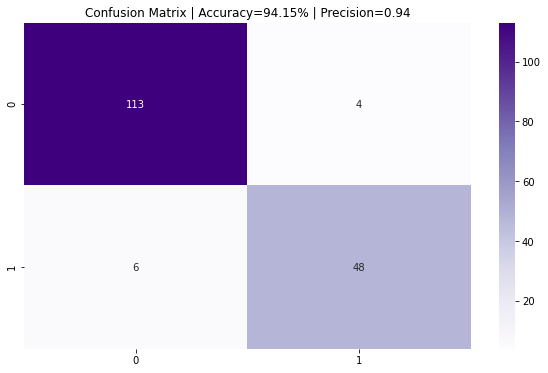

94.15

In [5]:
# K-NN  classifier to cheak
X_train, X_test, y_train, y_test = train_test_split(data,labels, test_size=0.3)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
CalculateMetricsAndPlot(y_test,y_pred,"Purples")
